# 一次元CNNの時系列解析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## とりあえずダミーデータ作成

#### これはノイズ除去用

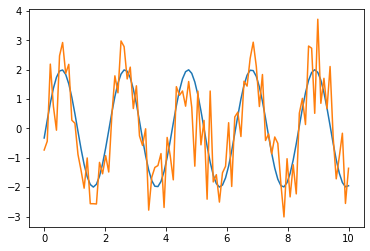

In [2]:
n_sample = 10000                           #作るサンプル数の指定
data_length = 100                          #作る時系列データの大きさ指定
time = 10                                  #作る時系列データの長さ指定

t = np.linspace(0,time,data_length)        #基準の時間軸生成
T = 1 + np.random.random((n_sample,1))*2   #時定数(周波数の逆数)を決める(T=[1,3))
A = 1 + np.random.random((n_sample,1))     #振幅を決める(A=[1,2))
_x = np.random.randn(n_sample,1)           #sin波平行移動用
y = A*np.sin((2*np.pi / T)*t.reshape(1,data_length) + _x)    #sin波を適当にn_sample作成(n_sample,data_length)
d = [np.random.randn(data_length) for i in range(n_sample)]  #外乱生成
y_origin = y        #教師データ
y_noise = y + d     #ノイズデータ

#二つだけプロット
plt.plot(t,y_origin[0])
plt.plot(t,y_noise[0])

## 訓練データとテストデータに分ける

In [5]:
X_train, X_test, y_train, y_test = train_test_split(y_noise,y_origin)
print("X_train => ",X_train.shape)
print("X_train => ",y_train.shape)
print("X_test => ",X_test.shape)
print("y_test => ",y_test.shape)


X_train_cnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cnn  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

X_train =>  (7500, 100)
X_train =>  (7500, 100)
X_test =>  (2500, 100)
y_test =>  (2500, 100)
(7500, 100)
(2500, 100)


## 必要そうなクラスや関数リストをまとめておく

**最低限必要なLayer Class**
- 畳み込み層(Conv1d)
- 平滑化層(Flatten)
- 全結合出力層(Affin)
 - 回帰
 - 二値分類
 - 多値分類
- Pooling層

あればうれしい
- 全結合中間層(全結合出力層で一緒に作れる)
- Atrous層

### Optimizerのクラス群
- SGD
- Adagrad

発展的なOptimizer
- Adam
- Eve
- 最近提案されたやつ(Adaboundsとか？)

## 実装していきましょう

## まずはConv1D Layer

入力は一般で X( batch_size, ch_in, data_size ) ですが分りやすいように X( 1, 1, 100 ) とします。  
フィルタ W( ch_size, filter_size ) が W( 2, 3 ) の時(Paddingがなければ)、出力 Y( batch_size, ch_out, output_size ) は Y( 1, 2, 98 ) です。

Forward Propagation と Back Propagationを 簡単に実験しましょう。（余裕という人は飛ばして実装するといいと思います）

In [ ]:
class Conv1D():
    def __init__(self):
        
        pass
    
    def forward(self,X):
        """
        X(入力):(batch_size,ch_size,data_size)
        W(層のフィルター):(ch,filter_size)
        
        
        出力
        y(output_data):特徴
        """
        
        